## Assignment 2
## Weight: 20%
## Unit - COMP329: Artificial Intelligence
## Date of Release: 18 October, 2018
## Date of Submission: 07 November, 2018 [11: 55 pm]


### Write your Details below:

# The goal of this assignment is to appreciate the power of Evolutionary Algorithms (e.g., Genetic Algorithm, or GA in short) for solving real-world problems such as the Travelling Salesman Problem (TSP) and simple adversarial games such as Tic-Tac-Toe.

## Travelling Salesman Problem:
### Acknowledgment: 
#### The following is largely based on Peter Norvig's note on TSP: (https://github.com/norvig/pytudes/blob/master/ipynb/TSP.ipynb)
#### Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

<img src="tsp.png">

#### Let's us define the problem more precisely
- ***Given a set of cities***
<br>A Python `set` could represent a set of cities. An individual city might be just an integer index, or it might be (x, y) coordinates.
- ... ***and the distance between each pair of cities***: 
<br>We could use either a function, `distance(A, B),` or a table, `distance[A, B]`.
- ... ***what is the shortest possible tour***
<br>A tour is a sequential order in which to visit the cities; a function `shortest_tour(tours)` should find the one that minimizes `tour_length(tour)`, which is the sum of the distances between adjacent cities in the tour. 
- ... ***that visits each city once and returns to the starting city***
<br>Make sure a tour doesn't re-visit a city (except returning to the start).

### The *vocabulary* of the problem:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
- **Cities**: We will need to represent a set of cities; Python's `set` datatype might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities. This could be done with a function, `distance(A, B)`, or with a dict, `distance[A][B]` or `distance[A, B]`, or with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The sum of the distances of adjacent cities in the tour. 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

### First algorithm: find the tour with shortest total distance from all possible tours

> *Generate all the possible tours of the cities, and choose the shortest one (the tour with the minimum total distance).*

### Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before finally retirning to the start. 
- A natural representation of the set of available cities is a Python `set`, and a natural representation of a tour is a sequence that is a *permutation* of the set. 
- The tuple `(1, 2, 3)`, for example, represents a tour that starts in city 1, moves to 2, then 3, and then returns to 1 to finish the tour.

In [3]:
alltours = itertools.permutations
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Representing Cities and Distance

Now for the notion of *distance*.  We define `total_distance(tour)` as the sum of the distances between consecutive cities in the tour; that part is shown below and is easy (with one Python-specific trick: when `i` is 0, then `distance(tour[0], tour[-1])` gives us the wrap-around distance between the first and last cities, because `tour[-1]` is the last element of `tour`). 


In [4]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [5]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

### Representing distance between cities

In [6]:
City = complex # Constructor for new cities, e.g. City(300, 400)

In [7]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [8]:
# An example to show the distance between city A and city B
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [9]:
# function to generate n cities randomly using random number generator
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [10]:
# Generating cities
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)

In [11]:
# Getting coordinates for 10 cities
cities10

{(144+140j),
 (248+131j),
 (279+388j),
 (29+42j),
 (38+151j),
 (488+139j),
 (508+580j),
 (689+297j),
 (860+173j),
 (885+515j)}

### functions to plot the tour

In [12]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

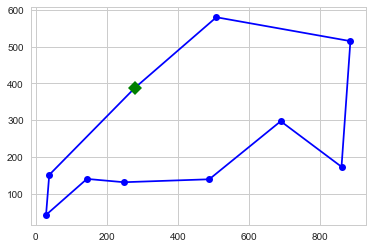

In [13]:
tour = exact_TSP(cities10)
plot_tour(tour)

### Removing redundant tours to increase efficiency
The permutation `(1, 2, 3)` represents the tour that goes from 1 to 2 to 3 and back to 1.  You may have noticed that there aren't really six different tours of three cities: the cities 1, 2, and 3 form a triangle;  any tour must connect the three points of the triangle; and there are really only two ways to do this: clockwise or counterclockwise.   In general, with $n$ cities, there are $n!$ (that is, $n$ factorial) permutations, but only  $(n-1)!$,  tours that are *distinct*: the tours `123`, `231`, and `312` are three ways of representing the *same* tour.

So we can make our `TSP` program $n$ times faster by never considering redundant tours. Arbitrarily, we will say that all tours must start with the "first" city in the set of cities. We don't have to change the definition of `TSP`&mdash;just by making `alltours` return only nonredundant tours, the whole program gets faster.


In [14]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cieaties):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))

In [15]:
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

### finding time based on First Approach: Exhaustive Search

In [16]:
%timeit exact_TSP(cities8)

145 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit exact_non_redundant_TSP(cities8)

5.3 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Second approach: Approximate (Heuristic) algorithms

### Greedy approach (Nearest Neighbor approach)
> *Start at any city; at each step extend the tour by moving from the previous city to its nearest neighbor that has not yet been visited.*

This is called a *greedy algorithm*, because it greedily takes what looks best in the short term (the nearest neighbor) even when that won't always be the best in the long term. 

In [18]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [19]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [20]:
cities = generate_cities(10)

In [21]:
%timeit exact_non_redundant_TSP(cities)

1.64 s ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


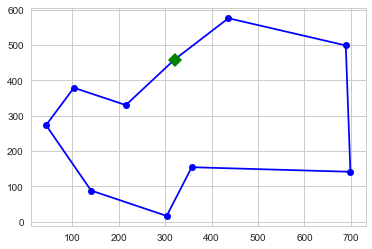

In [22]:
plot_tour(exact_non_redundant_TSP(cities))

In [23]:
%timeit greedy_TSP(cities)

23.1 µs ± 943 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


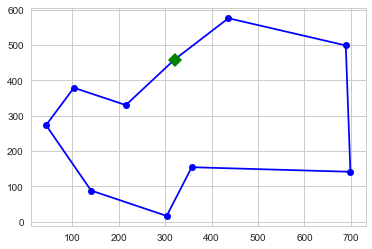

In [24]:
plot_tour(greedy_TSP(cities))

Comparing the time taken to get results for 10 cities, it is clear that greedy approach is efficient compared to the exhaustive search.

A [greedy algorithm](http://en.wikipedia.org/wiki/Greedy_algorithm) is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum. In many problems, a greedy strategy does not in general produce an optimal solution, but nonetheless a greedy heuristic may yield locally optimal solutions that approximate a global optimal solution in a reasonable time.

For many problmes greedy algorithms fail to produce the optimal solution, and may even produce the *unique worst possible solution*.

### A thought on computational complexity

<img src='http://imgs.xkcd.com/comics/travelling_salesman_problem.png' align='center' width='65%'/>


# Biologically inspired metaheuristic: Genetic Algorithm (GA)

- We have already studied GA in our lectures and did practice in our labs for one-max problem
- They are an option in which we dedicate a little more computational effort in order to produce better solutions than `greedy_TSP()`.

> We will be using the [DEAP](https://github.com/DEAP/deap) library to code this tackle this problem using a genetic algorithm. We have used DEAP in practical classes in this unit.

[<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' width='29%' align='center'/>](https://github.com/DEAP/deap)

In [25]:
from deap import algorithms, base, creator, tools

C:\Users\Arman Chowdhury\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [26]:
num_cities = 30
cities = generate_cities(num_cities)

In [27]:
toolbox = base.Toolbox()

In [28]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [29]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [30]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [31]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [32]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [33]:
toolbox.register("evaluate", evaluation)

In [34]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [35]:
pop = toolbox.population(n=100)

In [36]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

Wall time: 4.92 s


Let's check the efficiency of GA

In [37]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  4085.285122977322


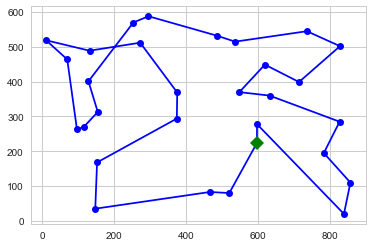

In [38]:
plot_tour(create_tour(best_individual))

It is interesting to assess how the fitness of the population changes as the evolution process proceeds. 

We can prepare a `deap.tools.Statistics` instance to specify what data to collect. 

In [39]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

In [40]:
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

#### Plotting mean and minimum fitness values as evolution proceeds

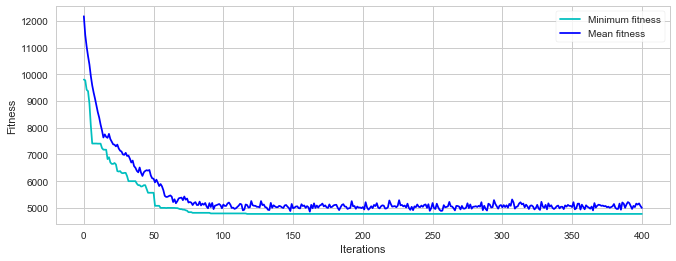

In [41]:
plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

### Q1. Compare the efficiency (time taken) of Exhaustive search, greedy search, and Genetic Algorithm for the 30 cities. [ 1 Marks]

In [42]:
# Write your output and analysis here

# Exhaustive Search for 10 cities
out = %timeit -o exact_TSP(cities10)
#print(str((out.average)*(math.factorial(29))/(math.factorial(10))/(3600*24)) + "days")

# Greedy search for 30 cities.
%timeit greedy_TSP(cities)

# Genetic Algorithm
%timeit algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=0.8, mutpb=0.2, ngen=400, verbose=False)

16.2 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
180 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.13 s ± 326 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
print(str(((out.average))*(math.factorial(29))/(math.factorial(9))/(3600*24*365)) + " years")

1.2480436006048248e+19 years


Explanation:

Exhaustive Search:
Exhaustive search is designed to explore all the possible combinations that exist for any given set. In our case we have 30 cities which result in n-1 factorial conbinations (29!). This computation will take a really long time, thus we can draw an estimation of the efficiency of an exhaustive search by using the time taken for performing such a search on 10 cities.

The efficiency for running an exhaustive search algorithm on 10 cities is 15.6s. This can be multiplied with 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28 and 29 in sucession to give the estimate of the efficiency for 30 cities.

Thus, the resultant time for 10 cities is multiplied with 29 factorial and then divided by 9 factorial tp give us a grant total of 1.24 x 10^19 years.

Greedy Search:
The greedy search had the best efficiency out of the three algorithms with a time of 180 micro seconds.

Genetic Algorithm:
The search conduted using the genetic algorithms took almost 1000 times more. It had an efficiency of 5.13 seconds.

The timeit function for exhaustive search was used on 10 cities to get an estimate of the efficiency. We can then multiply this with the appropriate facorial values and get an answer for the efficiency of performing exhaustive search on 30 cities.

As we can see that the exhaustive search is the worst of the three.

### Q2. Analyse the effect of population size for the above experiment. Try population size having value [25, 50, 75, 100, 125, 150, 175, 200] [ 1.5 Marks]

Text(0.5,1,'Variation in Population Size with 30 cities for Genetic Algorithm')

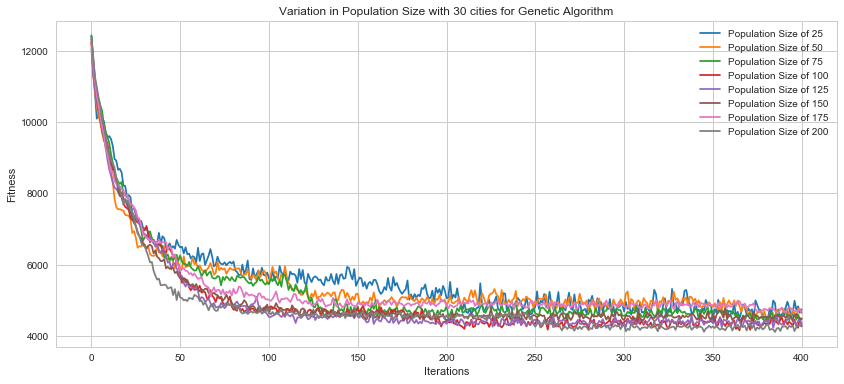

In [44]:
# Write your code here

popSize = [25, 50, 75, 100, 125, 150, 175, 200]
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

plt.figure(figsize=(14,6))
for p in range(len(popSize)):
    result, log = algorithms.eaSimple(toolbox.population(n=popSize[p]), toolbox, cxpb=0.5, mutpb=0.2, ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[p], label='Population Size of '+str(popSize[p]))

plt.legend()
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Population Size with 30 cities for Genetic Algorithm')

### Q3. What is the influence  of mutation probability and cross-over probability over the performance of  GA. [ 1.5 Marks]

Text(0.5,1,'Variation in Mutation Probability with 30 cities for Genetic Algorithm')

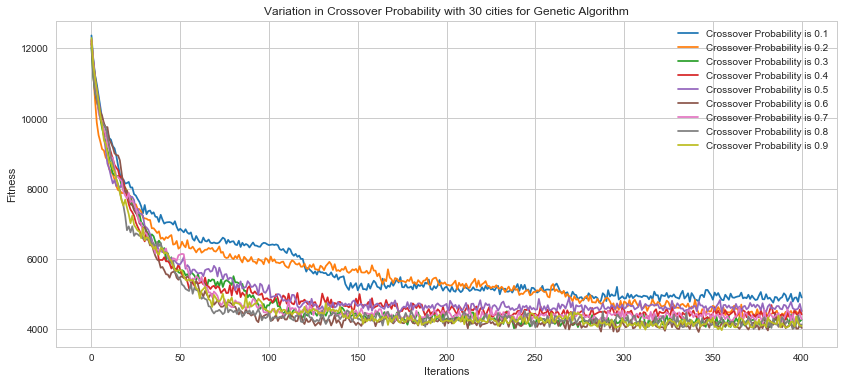

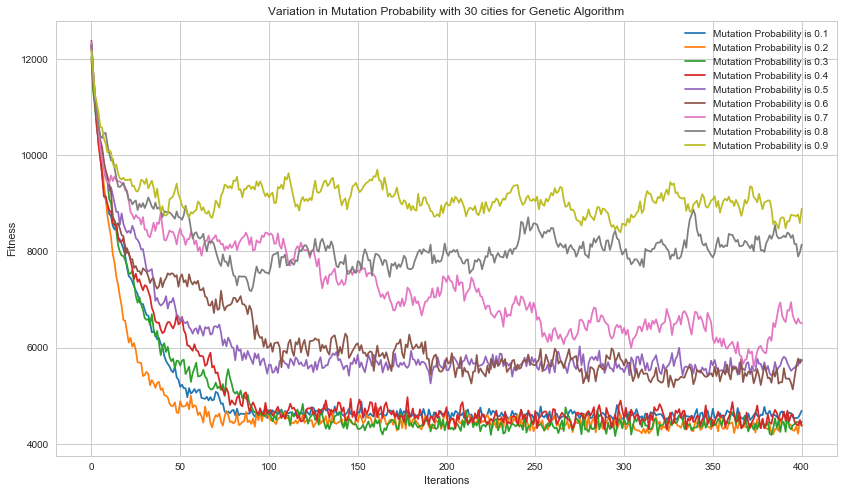

In [45]:
# Write your code here

################################################################################################################################
# Variation in Crossover Probability
crossOverProbability = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:sky blue']

plt.figure(figsize=(14,6))
for c in range(len(crossOverProbability)):
    result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=crossOverProbability[c], mutpb=0.2, ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[c], label='Crossover Probability is '+str(crossOverProbability[c]))

plt.legend()
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Crossover Probability with 30 cities for Genetic Algorithm')

################################################################################################################################
# Variation in Mutation Probability
mutationProbability = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(14,8))
for m in range(len(mutationProbability)):
    result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=0.5, mutpb=mutationProbability[m], ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[m], label='Mutation Probability is '+str(mutationProbability[m]))

plt.legend()
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Mutation Probability with 30 cities for Genetic Algorithm')

### Extending GA to real data

We are given a set of 14 GPS positions, each coordinate representing a city in Burma (Officially the Republic of the Union of Myanmar). Our objective is to solve the TSP problem over these 14 cities. You need to do bit of independent research for finding the formula to convert the GPS coodinates of two cities (in latitudes and longitudes) to the actual distance between those two cities.

City[i] = {LAT[i], LON[i]}

In [46]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

### Q4. Calculate the total distance (in Kilometres) of a tour starting with city[0], going in the order given to city[1], city[2], ... city[13] and coming back to city[0],  based on *Latitude* and *Longitude* of the 14 cities above. [2 Marks] 

In [47]:
# Write your code here

import geopy as geoDude
from geopy.distance import geodesic

# Generate list of cities from LAT and LON.
totalDistanceForNewCities = []

# Creates cities in the order which is given.
for i in range(len(LAT)):
    if i == len(LON) - 1:
        totalDistanceForNewCities.append(geodesic((LAT[i],LON[i]), (LAT[0],LON[0])).km)
        break    
    totalDistanceForNewCities.append(geodesic((LAT[i],LON[i]), (LAT[i+1],LON[i+1])).km)

#print('Distance Between All Cities:')
#print(totalDistanceForNewCities)
print('Sum: ' + str(sum(totalDistanceForNewCities)) + ' km')

Sum: 4624.337797649559 km


### Q5. Provide the optimal route you found employing GA, and its length in kilometers.  [2 Marks]

C:\Users\Arman Chowdhury\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Arman Chowdhury\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Wall time: 0 ns
Optimum Tour: 
[(21.52+95.59j), (22+96.05j), (25.23+97.24j), (22.39+93.37j), (20.09+92.54j), (20.09+94.55j), (16.47+94.44j), (16.47+96.1j), (14.05+98.12j), (16.3+97.38j), (16.53+97.38j), (17.2+96.29j), (19.41+97.13j), (20.47+97.02j)]
Fitness of the best individual:  3346.7619740386303


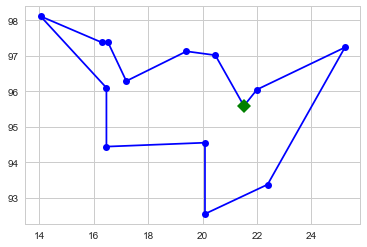

In [50]:
from deap import algorithms, base, creator, tools
from geopy.distance import geodesic

# Generate cities from Latitude and Longitude values.
def generate_LONLAT_cities(LON,LAT):
    temporarylist = set()
    for i in range(len(LON)):
        temporarylist.add((City(LAT[i],LON[i])))
    return temporarylist

################################################################################################################################

# Find the distances between two cities in kilometers.
def km_distance(A,B):
    return geodesic((A.real,A.imag), (B.real,B.imag)).km

################################################################################################################################

# Find the total distance of the whole tour.
def km_total_distance(newtour):
    return sum(km_distance(newtour[i], newtour[i-1])
              for i in range(len(newtour)))

# Store the list of cities in a list.
cities = generate_real_cities(LON,LAT)

################################################################################################################################
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

def create_tour(individual):
    return [list(cities)[e] for e in individual]

def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    
    return (real_total_distance(create_tour(individual)),)

toolbox.register("evaluate", evaluation)

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=100)

# From Question 3.
# Best CXPB = 0.9
# Best MUTPB = 0.1
# Best POP = 150
%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.9, mutpb=0.1,
                             ngen=150, verbose=False)

best_individual = tools.selBest(result, k=1)[0]
print('Optimum Tour: ')
print(create_tour(best_individual))
print('Fitness of the best individual: ', evaluation(best_individual)[0])

best_individual

plot_tour(create_tour(best_individual))

Choice of Values:

From Question 3 we found that the optimum values for the various parameters to use are the following:

Crossover Probability: 0.9
Mutation Probability: 0.1
Population: 150

### Q6. Describe your fitness function, and the way you encoded the potential solutions. [2 Marks]

### Q7. Provide the configuration of the GA you finally used, namely, mutation probability, crossover probability, population size, type of selection, type of mutation, type of crossover, and number of generations. [2 Marks]

## Solving Tic-Tac-Toe using Genetic Algorithm (GA)
The game of Tic Tac Toe (2D) is played on a 3 by 3 grid.  One player marks her squares with an X, and the other with an O.  The players alternate, placing their marks on an empty cell on the grid with the hope of winning the game.  The winner of the game is the first player to place 3 of their marks in a line (row, column, and diagnoal).  If the entire grid is filled with marks, and there is no winner, the game is declared a draw.  Your task is to create a player to play the 3D version of this game without any knowledge of strategies for playing Tic Tac Toe.  The only rule that is known to this evolving player is that the players alternate their turns, and when it is the evolving player’s turn, it could only place its own mark on an empty spot in the grid. We have already implemented Negamax algorithm to play 3D tic-tac-toe in one of the practicals. In this assignment, we try to solve 3D (3 x 3 x 3) Tic-Tac-Toe game using Genetic Algorithm (GA). 

### 3D (3 x 3 x 3) tic-tac-toe
<img src="3d_tic-tac-toe-3d.jpg" style="width: 200px"/>

### Q8. How did you approach the problem of representing the solution space, and why?  Did you face any specific problem for this – for instance, choosing between different possible representations? How did you overcome any such problem? Give as example how, in your approach, Tic-Tac-Toe (3D version) will be represented, and explain clearly how one can read off the strategy for Tic-Tac-Toe from this “chromosome”. [2 Marks] 

# Q9. What  fitness  function  did you  choose  to  go  with  your  approach,  and  why?   As  before, describe if you faced any specific problem in this context, and how you overcame it. [1 Marks]

### Q10. What parameters for Genetic algorithm did you choose?  For instance what type of crossover did you choose,  with what probability,  and why?  Also outline how you determined that the solution you received is good enough. [2 Marks]

### Q11. Provide your complete code for solving 3D (3 x 3 x 3) Tic-Tac-Toe using Genetic Algorithm. Note that this code should be complete (should not call any methods from the above code for solving TSP). You need to design the layout of the game either in console (command prompt) or Graphical User Interface (GUI) so that human (one of the players) can play against the AI machine (GA). [ 3 Marks]

### On execution of your code:
- it asks the human to pick either *X* or *O* as their preferred mark. 
- it lets the human player choose who would start the game.
- After the game is over, it displays the result (who wins/loses or it ended in a draw)

In [51]:
# All the libraries that are required for this program.
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
# To randomize data.
import random, operator, time, itertools, math
import numpy

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

# This literally colors the notebook text. LOL!
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

# Takes 
from deap import algorithms, base, creator, tools

# Setting up the fit stats tools again.
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

# There are 27 spots where players can place their X's and O's.
# Creating a list of possible spots that exist in the game.
moveList = [x + 1 for x in range(27)]

# Making an individual.
def generateIndividual():
    # An individual is essentially a list of indices.
    # They refer to the list of moves mentioned above.
    # But exclude the moves that have occured in the game already.
    individual = list(numpy.random.permutation(len(moveList) - len(occured)))
    return individual

################################################################################################################################

# Setting up the ThreeD Toolbox for the AI.
# Same as before.
ThreeDtoolbox = base.Toolbox()

# Changed.
creator.create("FitnessMax", base.Fitness, weights=(+1.0,))
# We are using a FitMax method. So A Bigger number is better.
creator.create("Individual", list, fitness=creator.FitnessMax)
# "moves" is my function call for "generateIndividuals".
ThreeDtoolbox.register("moves", generateIndividual)
# Same as before.
ThreeDtoolbox.register("individual", tools.initIterate, creator.Individual,
                 ThreeDtoolbox.moves)
# Same as before.
ThreeDtoolbox.register("population", tools.initRepeat, list, 
                 ThreeDtoolbox.individual)
# Same as before.
ThreeDtoolbox.register("mate", tools.cxUniformPartialyMatched, indpb=0.3)
# Same as before.
ThreeDtoolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

C:\Users\Arman Chowdhury\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [58]:
# List which will store all the moves that have occured in the game already.
occured = []

# List of combinations that will make any player win in this game.
winningMoves = [[1,2,3], [4,5,6], [7,8,9],
            [10,11,12], [13,14,15], [16,17,18],
            [19,20,21], [22,23,24], [25,26,27],
            #
            [1,10,19], [2,11,20], [3,12,21],
            [4,13,22], [5,14,23], [6,15,24],
            [7,16,25], [8,17,26], [9,18,27],
            #
            [1,4,7], [2,5,8], [3,6,9],
            [10,13,16], [11,14,17], [12,15,18],
            [19,22,25], [20,23,26], [21,24,27],
            #
            [1,5,9], [3,5,7], [10,14,18], [12,14,16], [19,23,27], [21,23,25],
            [1,13,25], [7,13,19], [2,14,26], [8,14,20], [3,15,27], [9,15,21],
            [7,17,27], [9,17,25], [4,14,24], [6,14,22], [1,11,21], [3,11,19],
            #
            [1,14,27], [3,14,25], [7,14,21], [9,14,19]]

#################################################################################################################################
    
movesLeftInGame = moveList

#################################################################################################################################

# How many ways does the current moveList give you a win.
def participation(opp, test):
    #print(opp)
    count = 0
    for win in winningMoves:
        if test in win:
            if len(set(opp).intersection(set(win))) == 0 or len(opp) == 0:
                count = count + 1
    return count

#################################################################################################################################

# Special for-loop which checks through the list "winningMoves"
# against the "individual" (list of 27 random moves) to see if player has won.
def checkForWin(move):
    for win in winningMoves:
        if all (elem in move for elem in win):
            return True
    return False

#################################################################################################################################

# Takes the indices given in the individual, and returns the actual moves.
# For the first case we have 27 moves, which will be index + 1.
# Indexes range from 0 to 26. But the spots in the game are 1 to 27.
# After moves have occured (spots on the board have been taken),
# It will return an individual which contains the possible moves that can be
# Made.
# E.G :
# If occured = [2];
# And Individual is [0, 1, 2, 3, .....]
# It will return [1, 3, 4, 5, .....]
def moves(individual):
    # Returns list of moves that the indexes refer to. :)
    return [movesLeft[x] for x in individual]

#################################################################################################################################

# Returns the number of ways in which the next two ANTICIPATED moves will
# Result in a win.
def winInTwo(moves, test):
    count = 0
    
    for move in moves:
        for elem in movesLeft:
            if(checkForWin([move, test, elem])):
                count = count + 1;
    return count
#################################################################################################################################

def updateMoves():
    # Will make a list of randomly permuted moves again.
    left = list(moveList)
    # remove the moves that have already occured in the game state.
    for i in range(len(moveList)):
        if moveList[i] in occured:
            left.remove(moveList[i])
            
    global movesLeft
    movesLeft = left

In [59]:
# THIS FITNESS FUNCTION  IS FOR WHEN THE AI PLAYS FIRST!!!

# This looks at the following pieces of information, and increases the fitness
# Function with some weights for each one that occurs.
# First looks at how long the individul takes to win.
# Then looks at if the first move presents teh opponent winning (a block)
# Then determines how many possibilities the first moves open up.
# (That is how many ways it makes two moves in a row that will result in a win)
# (And also how many ways it can be used to win.)
def xoFitnessFirst(individual):
    global occured # Don't know if I actually need this.
    # Starting Fitness
    fitness = 0
    # Ends gameState after the individual's mvoes occur.
    gameState = occured + moves(individual)
    
    #FIRST, WE LOOK AT MINIMISING THE NUMBER OF TURNS THAT LEAD TO A WIN.
    for turn in range(len(gameState)):
        # Won and hasn't lost
        if checkForWin(gameState[:turn + 1:2]) and not checkForWin(gameState[1:turn+1:2]):
            # Higher number for shorter turns, lowest at turn = 0.
            fitness+= 15000/(turn + 1)
            # Only want to add once we find the first win.
            break;
            
    # THEN WE CHECK TO SEE IF THE FIRST MOVE OF THE INDIVIDUAL BLOCKS THE OPPONENT.
    ai = occured[::2] # Evens
    opp = occured[1::2] # Odds
    opp.append(moves(individual)[0])
    
    # BLOCKS SOMETHING.
    if checkForWin(opp):
        #Change fitness-> block moves
        fitness += len(individual)*500
        
    # Redefining opp as just the odds again.
    opp = occured[1::2]
    # Num ways next move makes two in a row.
    fitness += winInTwo(ai, moves(individual)[0])*250
    # Num of times it is involved in a win UPDATE TO INCLUDE OPP. MOVES
    fitness += participation(opp, moves(individual)[0])*100
    
    return [fitness]


In [60]:
# THIS FITNESS FUNCTION  IS FOR WHEN THE AI PLAYS SECOND!!!

def xoFitnessSecond(individual):
    # Where the prev function looks at evens, this one looks at odds
    # Looks at odds instead of evens and vice versa
    global occured
    # Starting fitness.
    fitness = 0
    gameState = occured + moves(individual)
    #FIRST, MINIMISE THE NUMBER OF TURNS TO WIN
    for turn in range(len(gameState)):
        # This is what changed vs 2nd. The list accessing.
        if checkForWin(gameState[1:turn+1:2]) and not checkForWin(gameState[:turn+1:2]):
            # Higher weight for shorter turns, lowest at turn = 0.
            fitness+= 15000/(turn+1)
            # Stop adding stuff after we add it once.?
            break;       
    #THEN if the first move of the individual blocks the opponent.
    ai = occured[1::2] # Evens
    opp = occured[::2] # Odds
    opp.append(moves(individual)[0])
    
    if checkForWin(opp): #BLOCKS SOMETHING.
        fitness+=len(individual)*500 #change fitness
        
    # Redefining opp as just the odds again.
    opp = occured[::2]
    # Number of ways next move makes two in a row.
    fitness+=winInTwo(ai, moves(individual)[0])*250
    # Number of times it is involved in a win
    fitness+=participation(opp, moves(individual)[0])*100
    
    return [fitness] # Max fitness value -> all losses = 27, all draws = 27

# Sets the selection type
ThreeDtoolbox.register("select", tools.selTournament, tournsize=3)

# Variation in mutation probability

Text(0.5,1,'Variation in Mutation Probability with 3D Tic Tac Toe for Genetic Algorithm')

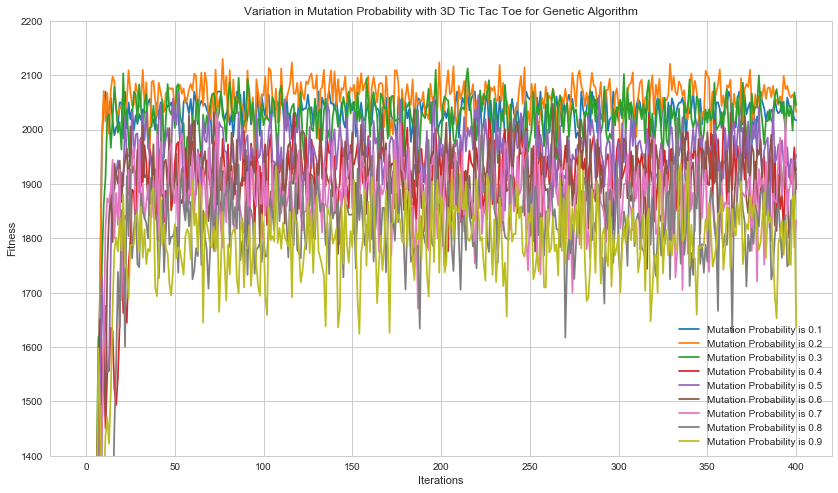

In [70]:
# Variation in Mutation Probability
mutationProbability = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(14,8))
for m in range(len(mutationProbability)):
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=100), ThreeDtoolbox, cxpb=0.5, mutpb=mutationProbability[m], ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[m], label='Mutation Probability is '+str(mutationProbability[m]))

plt.legend()
plt.gca().set_ylim([1400, 2200])
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Mutation Probability with 3D Tic Tac Toe for Genetic Algorithm')

Observation:
A mutation probability of 0.2 performs the best and gives the best fitness values.

# Variation in Crossover Probability

Text(0.5,1,'Variation in Mutation Probability with 3D Tic Tac Toe for Genetic Algorithm')

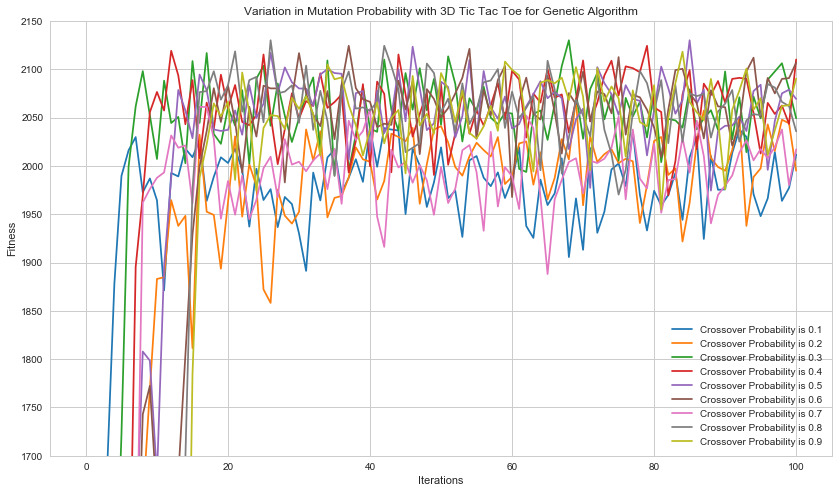

In [76]:
# Variation in Crossover Probability
occured = []

ThreeDtoolbox.register("evaluate", xoFitnessFirst)
updateMoves()

crossOverProbability = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:sky blue']

plt.figure(figsize=(14,8))
for c in range(len(crossOverProbability)):
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=100), ThreeDtoolbox, cxpb=crossOverProbability[c], mutpb=0.2, ngen=100, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[c], label='Crossover Probability is '+str(crossOverProbability[c]))

plt.legend()
plt.gca().set_ylim([1700, 2150])
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Mutation Probability with 3D Tic Tac Toe for Genetic Algorithm')


Problem:
The above graph is a bit hard to read, but lets plot the crossover probabilities
0.7, 0.8 and 0.9

Text(0.5,1,'Variation in Crossover Probability with 3D Tic Tac Toe for Genetic Algorithm')

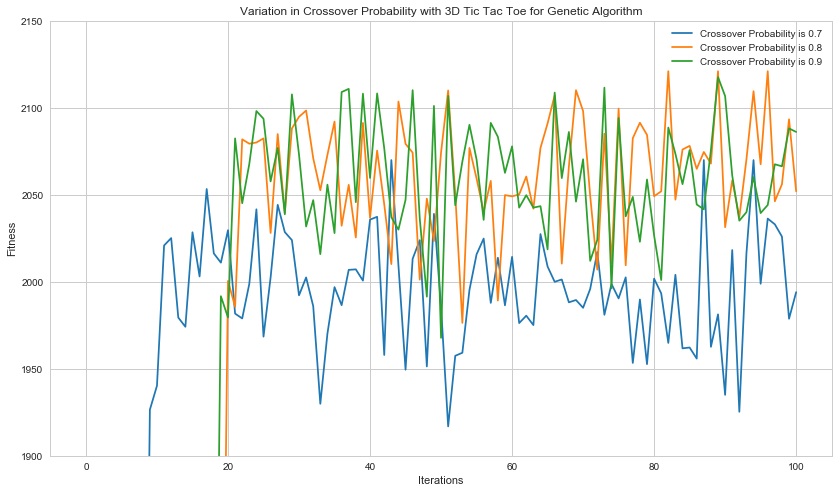

In [79]:
# Variation in Crossover Probability
occured = []

ThreeDtoolbox.register("evaluate", xoFitnessFirst)
updateMoves()

crossOverProbability = [0.7, 0.8, 0.9]
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:sky blue']

plt.figure(figsize=(14,8))
for c in range(len(crossOverProbability)):
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=100), ThreeDtoolbox, cxpb=crossOverProbability[c], mutpb=0.2, ngen=100, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[c], label='Crossover Probability is '+str(crossOverProbability[c]))

plt.legend()
plt.gca().set_ylim([1900, 2150])
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Crossover Probability with 3D Tic Tac Toe for Genetic Algorithm')


Observation:
It can be seen that the best performing crossover probability is 0.8

# Variation in Population Size

Text(0.5,1,'Variation in Population Size (n = 25, n = 50, n = 75, n = 100) with 3D Tic Tac Toe for Genetic Algorithm')

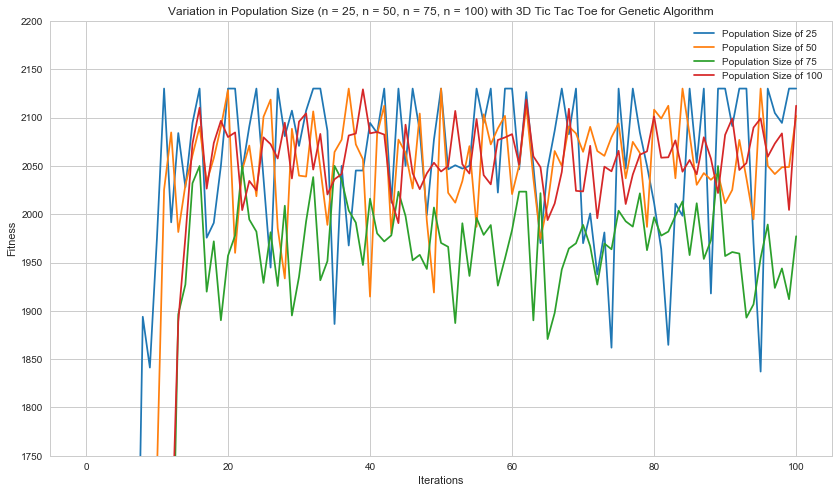

In [83]:
# Plotting variation in population size ranging from 25 to 100.
popSize = [25, 50, 75, 100]
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

plt.figure(figsize=(14,8))
for p in range(len(popSize)):
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=popSize[p]), ThreeDtoolbox, cxpb=0.8, mutpb=0.2, ngen=100, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[p], label='Population Size of '+str(popSize[p]))

plt.legend()
plt.gca().set_ylim([1750, 2200])
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Population Size (n = 25, n = 50, n = 75, n = 100) with 3D Tic Tac Toe for Genetic Algorithm')

Text(0.5,1,'Variation in Population Size (n = 125, n = 150, n = 175, n = 200) with 3D Tic Tac Toe for Genetic Algorithm')

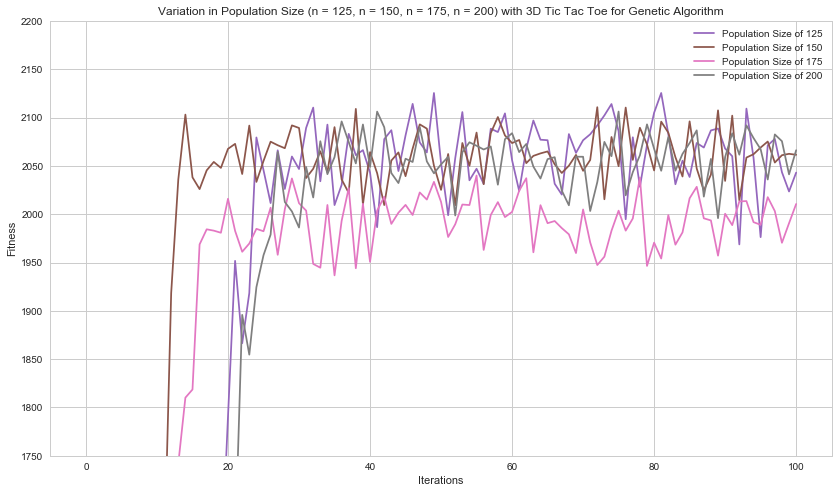

In [85]:
# Plotting the variation in population from 125 to 200.
popSize = [125, 150, 175, 200]
color = ['tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

plt.figure(figsize=(14,8))
for p in range(len(popSize)):
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=popSize[p]), ThreeDtoolbox, cxpb=0.8, mutpb=0.2, ngen=100, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), color[p], label='Population Size of '+str(popSize[p]))

plt.legend()
plt.gca().set_ylim([1750, 2200])
plt.ylabel('Fitness'); plt.xlabel('Iterations');
plt.title('Variation in Population Size (n = 125, n = 150, n = 175, n = 200) with 3D Tic Tac Toe for Genetic Algorithm')

Observation:
The best performing population size is 150.

# Optimum Parameters

[14, 10, 3, 2, 25, 22, 24, 26, 11, 4, 6, 8, 19, 27, 5, 21, 23, 12, 17, 7, 15, 18, 16, 20, 13, 9, 1]


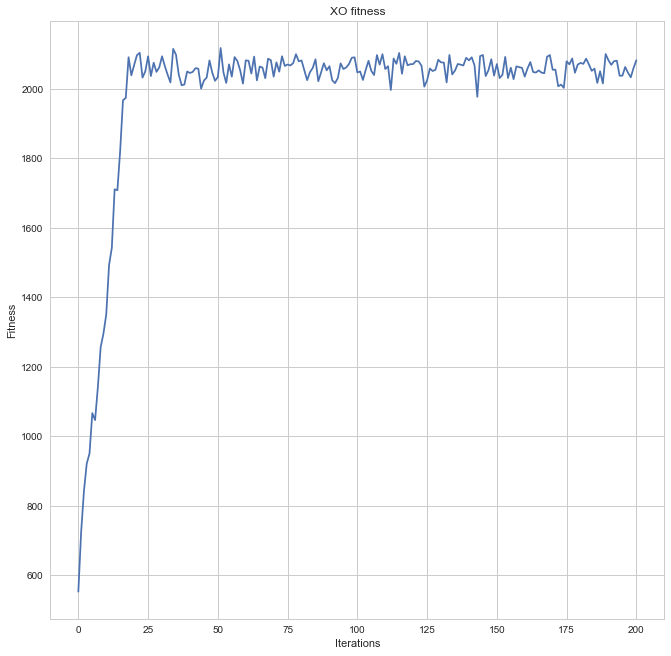

In [86]:
#PLOTTING SPACE, TESTING THE FITNESS FUNCTION AND DIFFERENT VARIABLES.
occured = []
ThreeDtoolbox.register("evaluate", xoFitnessFirst)
updateMoves()
result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=150), ThreeDtoolbox, cxpb=0.8, mutpb=0.2, ngen=200, verbose=False, stats=fit_stats)
# Print top performing individual. 
print(moves(tools.selBest(result, k=1)[0]))
plt.figure(figsize = (11, 11))
plt.plot(log.select('mean'))
plt.title("XO fitness")
plt.ylabel('Fitness'); plt.xlabel('Iterations');

# The Game

In [64]:
#THE CORE GAME CODE.
board = [0]*27#list for the board locations.
occured = []
updateMoves()

def printBoard():
    boardString = '\n\n'
    for i in range(len(board)):

        if board[i] == 0:
            boardString = boardString+' '+str(i+1).zfill(2)+' '
        if board[i] == player:
            boardString = boardString+' '+AI_Icon+' '
        if board[i] == AI:
            boardString = boardString+' '+icon+' '

        if (i+1)%3 == 0:
            boardString = boardString+'\n'
        if (i+1)%9 == 0:
            boardString = boardString+'\n'
            
    print(boardString)
    
def setupGame():
    global icon
    global player
    global AI
    global AI_Icon
    global active
    
    icon = input("You are going to play 3-Dimensional Tic-Tac-Toe. \nWhat do you to play, X or O?\n" )
    player = input('\n'+'Do you want to go 1st or 2nd? enter 1 or 2?\n')
    
    if icon == 'X' or 'x':
        icon = 'X '
        AI_Icon = 'O '
    else:
        icon = 'O '
        AI_Icon = 'X '
        
    if player == '1':
        player = 1
        active = player
        AI = 2
    else:
        player = 2
        AI = 1
        active = AI
        
        
    print('\n'+ '\n' + "You are going to play 3-Dimensional Tic-Tac-Toe. Your have chosen "+str(icon)+","+" and "+str(player))
    print("Enter 1, 2,..., 27  to choose the corresponding slot." + '\n')
    
    print("Note: 01, 10 and 19 are in a straight-line, as are 04, 14 and 24.")
    print('\t' + "And so are 03, 14 and 25.")
    
def findMove(play):
    if play == 1:
        ThreeDtoolbox.register("evaluate", xoFitnessFirst)
    else:
        ThreeDtoolbox.register("evaluate", xoFitnessSecond)
    result, log = algorithms.eaSimple(ThreeDtoolbox.population(n=100), ThreeDtoolbox, cxpb=0.8, mutpb=0.2, ngen=200, verbose=False, stats=fit_stats)  
    return moves(tools.selBest(result, k=1)[0])[0]

def makeMove(person, move):
    #expecing a move of int a player of int
    board[move-1] = person
    occured.append(move) #hope this works
    updateMoves()
    printBoard()
    

if __name__ == "__main__":
    setupGame()
    turn = 0
    while True:
        if active == player:
            
            move = int(input('What is your move, input 1 - 27? \t'))
            while move in occured:
                move = int(input('That move is taken, pick a different move.'))
            active = AI
        else: # ai move
            print("Thinking...")
            move = findMove(AI) #the AI, inputing 1st or 2nd btw
            active = player
            
        makeMove(active,move)
        
        if checkForWin(occured[:turn+1:2]) == True: #Player 1 wins
            if player == 1:
                print("YOU WON")
            else: 
                print("YOU LOSE")
            break
        if checkForWin(occured[1:turn+1:2]) == True: #Player 2 wins
            if player == 2:
                print("YOU WON")
            else: 
                print("YOU LOSE")
            break
        if len(occured) == 27: #DRAW
            print("DRAW")
            break
            
        turn +=1
    

You are going to play 3-Dimensional Tic-Tac-Toe. 
What do you to play, X or O?
X

Do you want to go 1st or 2nd? enter 1 or 2?
1


You are going to play 3-Dimensional Tic-Tac-Toe. Your have chosen X , and 1
Enter 1, 2,..., 27  to choose the corresponding slot.

Note: 01, 10 and 19 are in a straight-line, as are 04, 14 and 24.
	And so are 03, 14 and 25.
What is your move, input 1 - 27? 	3


 01  02  X  
 04  05  06 
 07  08  09 

 10  11  12 
 13  14  15 
 16  17  18 

 19  20  21 
 22  23  24 
 25  26  27 


Thinking...


 01  02  X  
 04  05  06 
 07  08  09 

 10  11  12 
 13  O   15 
 16  17  18 

 19  20  21 
 22  23  24 
 25  26  27 


What is your move, input 1 - 27? 	2


 01  X   X  
 04  05  06 
 07  08  09 

 10  11  12 
 13  O   15 
 16  17  18 

 19  20  21 
 22  23  24 
 25  26  27 


Thinking...


 O   X   X  
 04  05  06 
 07  08  09 

 10  11  12 
 13  O   15 
 16  17  18 

 19  20  21 
 22  23  24 
 25  26  27 


What is your move, input 1 - 27? 	5


 O   X   X  
 04  X 

## Your Submission method

Your submission should consist of this jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the output.

You have already used Jupyter Notebook earlier in the unit. In case you need help, you may refer the following tutorial https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook .

Late submissions may attract penalty in accordance with the assessment policy outlined in the unit guide.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).